In [218]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [219]:
df=pd.read_csv("student_study_habits.csv")
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [220]:
print(df.shape)
display(df.columns)

(500, 13)


Index(['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage',
       'assignments_completed', 'final_grade', 'participation_level_Low',
       'participation_level_Medium', 'internet_access_Yes',
       'parental_education_High School', 'parental_education_Master's',
       'parental_education_PhD', 'extracurricular_Yes', 'part_time_job_Yes'],
      dtype='object')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

In [222]:
df.isnull().sum()

study_hours_per_week              0
sleep_hours_per_day               0
attendance_percentage             0
assignments_completed             0
final_grade                       0
participation_level_Low           0
participation_level_Medium        0
internet_access_Yes               0
parental_education_High School    0
parental_education_Master's       0
parental_education_PhD            0
extracurricular_Yes               0
part_time_job_Yes                 0
dtype: int64

In [223]:
df.duplicated().sum()

np.int64(0)

In [224]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [225]:
df.skew()

study_hours_per_week              0.173201
sleep_hours_per_day               0.057551
attendance_percentage            -0.395270
assignments_completed             0.023763
final_grade                       0.091283
participation_level_Low           1.488933
participation_level_Medium        0.064226
internet_access_Yes              -2.500398
parental_education_High School    1.050754
parental_education_Master's       1.300555
parental_education_PhD            3.156717
extracurricular_Yes              -0.487183
part_time_job_Yes                 0.793930
dtype: float64

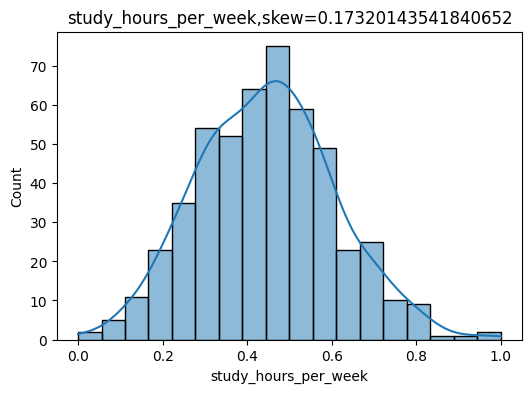

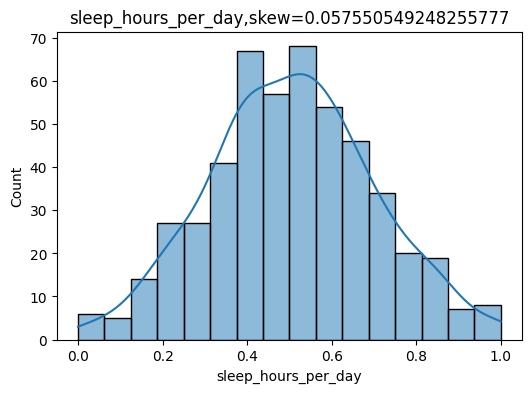

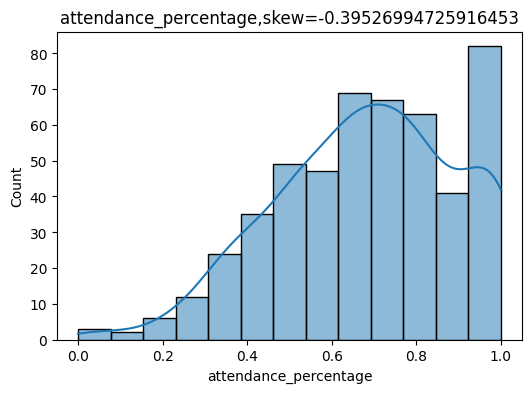

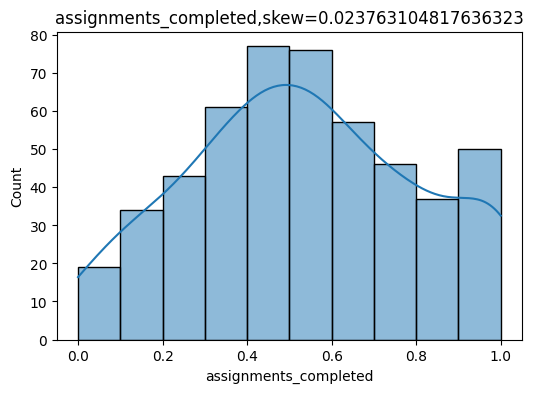

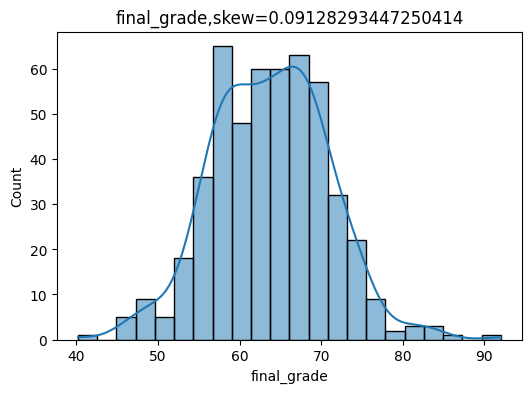

In [226]:
skewness = df.skew()
num_cols = ['study_hours_per_week', 'sleep_hours_per_day', 
                   'attendance_percentage', 'assignments_completed', 'final_grade']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col},skew={skewness[col]}")
    plt.show()


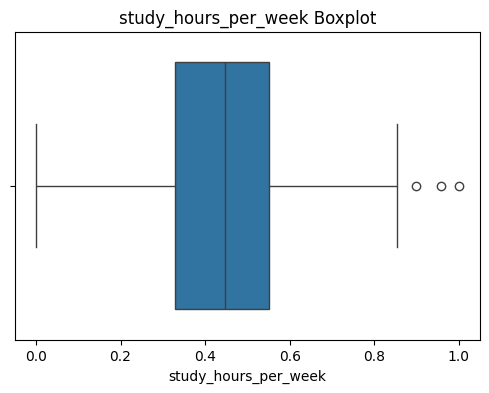

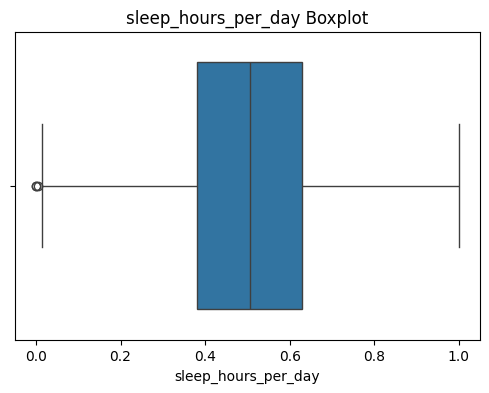

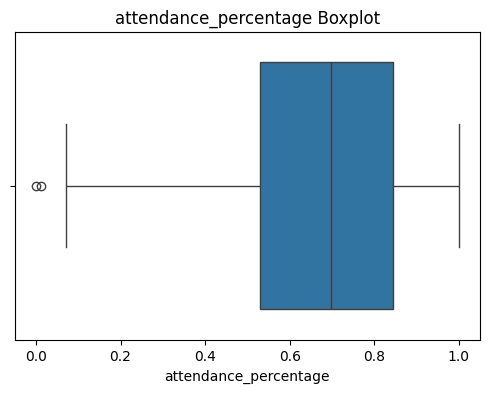

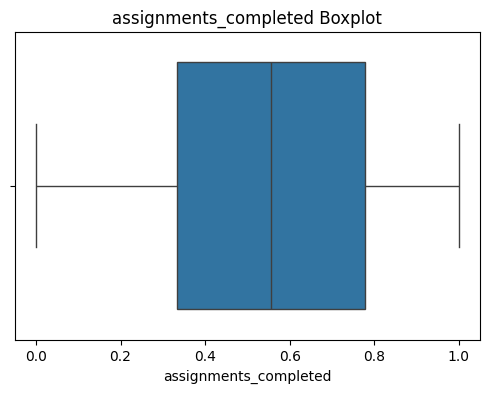

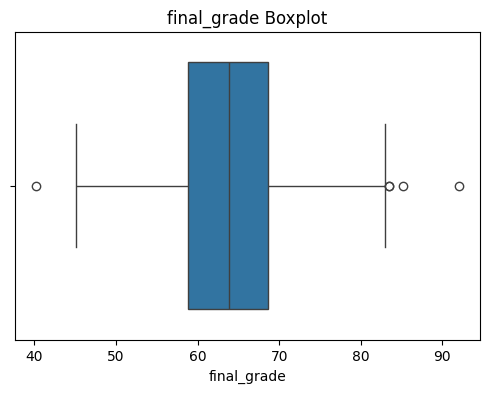

In [227]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

In [228]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

study_hours_per_week: 3 outliers
sleep_hours_per_day: 3 outliers
attendance_percentage: 2 outliers
assignments_completed: 0 outliers
final_grade: 5 outliers


In [229]:
df['Performance'] = pd.cut(df['final_grade'],bins=[0, 59, 79, 100],labels=['Low', 'Medium', 'High'])
le_target = LabelEncoder()
df['Performance'] = le_target.fit_transform(df['Performance'])
X = df.drop(columns=['Performance', 'final_grade'])
y=df['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Accuracy: 0.87


In [231]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

Confusion Matrix:
[[ 0  0  3]
 [ 0 12  8]
 [ 0  2 75]]


In [232]:
precision_weighted = precision_score(y_test, y_pred_rf, average='weighted')
recall_weighted = recall_score(y_test, y_pred_rf, average='weighted')
f1_weighted = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Precision: {precision_weighted:.2f}")
print(f"Recall: {recall_weighted:.2f}")
print(f"F1-score: {f1_weighted:.2f}")

Precision: 0.84
Recall: 0.87
F1-score: 0.85


d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [233]:
num_features = ['study_hours_per_week','sleep_hours_per_day','attendance_percentage','assignments_completed']
X_train_num = X_train[num_features]
X_test_num = X_test[num_features]
nb = GaussianNB()
nb.fit(X_train_num, y_train)
y_pred_nb = nb.predict(X_test_num)
print(f"GaussianNB Accuracy (numeric features only): {accuracy_score(y_test, y_pred_nb):.2f}")

GaussianNB Accuracy (numeric features only): 0.78


In [234]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(cm_nb)

Confusion Matrix:
[[ 0  0  3]
 [ 0  9 11]
 [ 0  8 69]]


In [235]:
precision_weighted_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_weighted_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_weighted_nb = f1_score(y_test, y_pred_nb, average='weighted')
print(f"Precision: {precision_weighted_nb:.2f}")
print(f"Recall: {recall_weighted_nb:.2f}")
print(f"F1-score: {f1_weighted_nb:.2f}")

Precision: 0.75
Recall: 0.78
F1-score: 0.76


d:\AIWF\Task11(7.10.25)\env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [236]:
import pickle as pkl
models_dict = {
    'RandomForest': rf,
    'GaussianNB': nb,
    'LabelEncoder': le_target
}

with open('student_models.pkl', 'wb') as f:
    pkl.dump(models_dict, f)